In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#from category_encoders.one_hot import OneHotEncoder
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

print(os.getcwd())    
os.chdir("C:\\Users\malejin\Documents\Python Scripts\kaggle_stroke")
print(os.getcwd())   

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


C:\Users\malejin\Documents\Python Scripts\kaggle_stroke
C:\Users\malejin\Documents\Python Scripts\kaggle_stroke


In [3]:
#reading data
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,34496,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,0
1,72819,Female,82.00,0,0,Yes,Self-employed,Urban,243.59,24.3,never smoked,0
2,16812,Female,82.00,0,1,Yes,Self-employed,Rural,229.58,23.7,Unknown,0
3,4753,Male,82.00,0,1,Yes,Self-employed,Urban,228.92,27.9,formerly smoked,0
4,62452,Male,82.00,1,0,Yes,Private,Rural,227.28,33.3,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
5106,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
5107,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
5108,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [4]:
#get info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#get rownum
row, col = data.shape
print(row)
print(col)


5110
12


In [6]:
#drop rows with duplicated values
data.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,34496,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,0
1,72819,Female,82.00,0,0,Yes,Self-employed,Urban,243.59,24.3,never smoked,0
2,16812,Female,82.00,0,1,Yes,Self-employed,Rural,229.58,23.7,Unknown,0
3,4753,Male,82.00,0,1,Yes,Self-employed,Urban,228.92,27.9,formerly smoked,0
4,62452,Male,82.00,1,0,Yes,Private,Rural,227.28,33.3,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
5106,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
5107,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
5108,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


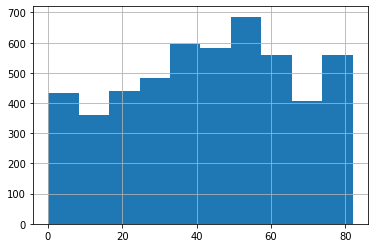

In [7]:
#check distribution of columns
data['age'].hist(bins=10)

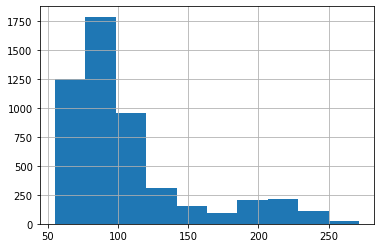

In [8]:
data['avg_glucose_level'].hist(bins=10)

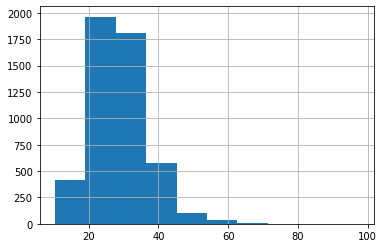

In [9]:
data['bmi'].hist(bins=10)

In [10]:
#check missing values
data.isna().sum()
data.isna().mean()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

Text(0.5, 1.0, 'Cardinality')

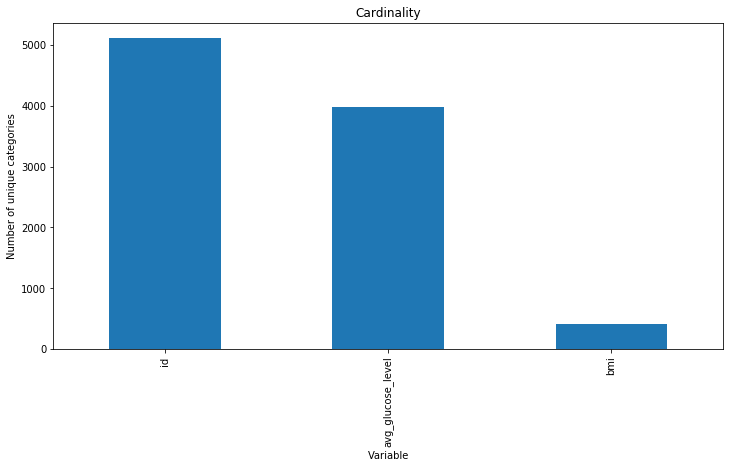

In [11]:
#check unique values of id, avg_glucose_level, bmi
data.iloc[:, [0,8,9]].nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variable')
plt.title('Cardinality')

# IMPUTE BMI

In [12]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
data['bmi']=imputer.fit_transform(data[['bmi']])

In [13]:
print(data.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [14]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,34496,Female,82.00,0,0,Yes,Private,Urban,253.16,47.5,Unknown,0
1,72819,Female,82.00,0,0,Yes,Self-employed,Urban,243.59,24.3,never smoked,0
2,16812,Female,82.00,0,1,Yes,Self-employed,Rural,229.58,23.7,Unknown,0
3,4753,Male,82.00,0,1,Yes,Self-employed,Urban,228.92,27.9,formerly smoked,0
4,62452,Male,82.00,1,0,Yes,Private,Rural,227.28,33.3,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
5106,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
5107,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
5108,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


# STANDARD SCALE AGE, GLUCOSE AND BMI

In [15]:
data_measures_age=data[['age']]
data_measures_age

data_measures_glucose=data[['avg_glucose_level']]
data_measures_glucose

data_measures_bmi=data[['bmi']]
data_measures_bmi

,bmi
0,47.5
1,24.3
2,23.7
3,27.9
4,33.3
...,...
5105,17.4
5106,13.9
5107,13.0
5108,14.1


In [16]:
#feature sclaing
sc = StandardScaler()

data_measures_age_ss = sc.fit_transform(data_measures_age).round(4)
data_measures_age_ss

data_measures_glucose_ss = sc.fit_transform(data_measures_glucose).round(4)
data_measures_glucose_ss

data_measures_bmi_ss = sc.fit_transform(data_measures_bmi).round(4)
data_measures_bmi_ss

array([[ 2.4173],
       [-0.5967],
       [-0.6747],
       ...,
       [-2.0648],
       [-1.9219],
       [-1.5581]])

In [17]:
data['age']=data_measures_age_ss
data['avg_glucose_level']= data_measures_glucose_ss
data['bmi']=data_measures_bmi_ss

In [18]:
data[data['stroke']==1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,67895,Female,1.7148,1,1,Yes,Govt_job,Urban,2.4248,-0.1290,formerly smoked,1
14,64778,Male,1.7148,0,1,Yes,Private,Rural,2.2561,0.4686,Unknown,1
15,37132,Male,1.7148,0,0,Yes,Govt_job,Urban,2.0858,0.0139,formerly smoked,1
16,39373,Female,1.7148,1,0,Yes,Self-employed,Urban,2.0047,-0.8696,never smoked,1
18,61960,Male,1.7148,0,1,Yes,Private,Urban,0.8559,-0.3239,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3038,31563,Female,-0.2312,0,0,Yes,Private,Rural,-0.1037,0.0000,formerly smoked,1
3059,31720,Female,-0.2312,0,0,No,Self-employed,Urban,-0.5271,-0.6357,formerly smoked,1
3439,39912,Female,-0.4965,0,0,Yes,Private,Rural,-0.6629,0.1308,smokes,1
4464,49669,Female,-1.2926,0,0,No,children,Rural,-1.0649,0.2607,Unknown,1


# SET DUMMY VARIABLES

In [19]:
data['gender_female']=pd.get_dummies(data.gender)['Female']
data['gender_male']=pd.get_dummies(data.gender)['Male']
data['gender_other']=pd.get_dummies(data.gender)['Other']
del  data['gender']
data

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_female,gender_male,gender_other
0,34496,1.7148,0,0,Yes,Private,Urban,3.2468,2.4173,Unknown,0,1,0,0
1,72819,1.7148,0,0,Yes,Self-employed,Urban,3.0354,-0.5967,never smoked,0,1,0,0
2,16812,1.7148,0,1,Yes,Self-employed,Rural,2.7260,-0.6747,Unknown,0,1,0,0
3,4753,1.7148,0,1,Yes,Self-employed,Urban,2.7115,-0.1290,formerly smoked,0,0,1,0
4,62452,1.7148,1,0,Yes,Private,Rural,2.6752,0.5725,never smoked,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,22877,-1.9047,0,0,No,children,Urban,0.1891,-1.4932,Unknown,0,0,1,0
5106,8247,-1.9047,0,0,No,children,Urban,0.0745,-1.9479,Unknown,0,0,1,0
5107,41500,-1.9047,0,0,No,children,Rural,-0.8030,-2.0648,Unknown,0,0,1,0
5108,47350,-1.9083,0,0,No,children,Urban,0.7403,-1.9219,Unknown,0,1,0,0


In [20]:
pd.get_dummies(data.ever_married)

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5105,1,0
5106,1,0
5107,1,0
5108,1,0


In [21]:
data['married']=pd.get_dummies(data.ever_married)['Yes']
data['single']=pd.get_dummies(data.ever_married)['No']
del data['ever_married']
data

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_female,gender_male,gender_other,married,single
0,34496,1.7148,0,0,Private,Urban,3.2468,2.4173,Unknown,0,1,0,0,1,0
1,72819,1.7148,0,0,Self-employed,Urban,3.0354,-0.5967,never smoked,0,1,0,0,1,0
2,16812,1.7148,0,1,Self-employed,Rural,2.7260,-0.6747,Unknown,0,1,0,0,1,0
3,4753,1.7148,0,1,Self-employed,Urban,2.7115,-0.1290,formerly smoked,0,0,1,0,1,0
4,62452,1.7148,1,0,Private,Rural,2.6752,0.5725,never smoked,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,22877,-1.9047,0,0,children,Urban,0.1891,-1.4932,Unknown,0,0,1,0,0,1
5106,8247,-1.9047,0,0,children,Urban,0.0745,-1.9479,Unknown,0,0,1,0,0,1
5107,41500,-1.9047,0,0,children,Rural,-0.8030,-2.0648,Unknown,0,0,1,0,0,1
5108,47350,-1.9083,0,0,children,Urban,0.7403,-1.9219,Unknown,0,1,0,0,0,1


In [22]:
data['job_selfemp']=pd.get_dummies(data.work_type)['Self-employed']
data['job_private']=pd.get_dummies(data.work_type)['Private']
data['job_never_worked']=pd.get_dummies(data.work_type)['Never_worked']
data['job_gov']=pd.get_dummies(data.work_type)['Govt_job']
data['children']=pd.get_dummies(data.work_type)['children']
del data['work_type']
data

,id,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_female,gender_male,gender_other,married,single,job_selfemp,job_private,job_never_worked,job_gov,children
0,34496,1.7148,0,0,Urban,3.2468,2.4173,Unknown,0,1,0,0,1,0,0,1,0,0,0
1,72819,1.7148,0,0,Urban,3.0354,-0.5967,never smoked,0,1,0,0,1,0,1,0,0,0,0
2,16812,1.7148,0,1,Rural,2.7260,-0.6747,Unknown,0,1,0,0,1,0,1,0,0,0,0
3,4753,1.7148,0,1,Urban,2.7115,-0.1290,formerly smoked,0,0,1,0,1,0,1,0,0,0,0
4,62452,1.7148,1,0,Rural,2.6752,0.5725,never smoked,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,22877,-1.9047,0,0,Urban,0.1891,-1.4932,Unknown,0,0,1,0,0,1,0,0,0,0,1
5106,8247,-1.9047,0,0,Urban,0.0745,-1.9479,Unknown,0,0,1,0,0,1,0,0,0,0,1
5107,41500,-1.9047,0,0,Rural,-0.8030,-2.0648,Unknown,0,0,1,0,0,1,0,0,0,0,1
5108,47350,-1.9083,0,0,Urban,0.7403,-1.9219,Unknown,0,1,0,0,0,1,0,0,0,0,1


In [23]:
data['res_urban']=pd.get_dummies(data.Residence_type)['Urban']
data['res_rurbal']=pd.get_dummies(data.Residence_type)['Rural']
del data['Residence_type']
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_female,gender_male,gender_other,married,single,job_selfemp,job_private,job_never_worked,job_gov,children,res_urban,res_rurbal
0,34496,1.7148,0,0,3.2468,2.4173,Unknown,0,1,0,0,1,0,0,1,0,0,0,1,0
1,72819,1.7148,0,0,3.0354,-0.5967,never smoked,0,1,0,0,1,0,1,0,0,0,0,1,0
2,16812,1.7148,0,1,2.7260,-0.6747,Unknown,0,1,0,0,1,0,1,0,0,0,0,0,1
3,4753,1.7148,0,1,2.7115,-0.1290,formerly smoked,0,0,1,0,1,0,1,0,0,0,0,1,0
4,62452,1.7148,1,0,2.6752,0.5725,never smoked,0,0,1,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,22877,-1.9047,0,0,0.1891,-1.4932,Unknown,0,0,1,0,0,1,0,0,0,0,1,1,0
5106,8247,-1.9047,0,0,0.0745,-1.9479,Unknown,0,0,1,0,0,1,0,0,0,0,1,1,0
5107,41500,-1.9047,0,0,-0.8030,-2.0648,Unknown,0,0,1,0,0,1,0,0,0,0,1,0,1
5108,47350,-1.9083,0,0,0.7403,-1.9219,Unknown,0,1,0,0,0,1,0,0,0,0,1,1,0


In [24]:
data['unknown_smoked']=pd.get_dummies(data.smoking_status)['Unknown']
data['formaly_smoked']=pd.get_dummies(data.smoking_status)['formerly smoked']
data['never_smoked']=pd.get_dummies(data.smoking_status)['never smoked']
data['smokes']=pd.get_dummies(data.smoking_status)['smokes']
del data['smoking_status']
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_female,gender_male,gender_other,...,job_private,job_never_worked,job_gov,children,res_urban,res_rurbal,unknown_smoked,formaly_smoked,never_smoked,smokes
0,34496,1.7148,0,0,3.2468,2.4173,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
1,72819,1.7148,0,0,3.0354,-0.5967,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,16812,1.7148,0,1,2.7260,-0.6747,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,4753,1.7148,0,1,2.7115,-0.1290,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,62452,1.7148,1,0,2.6752,0.5725,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,22877,-1.9047,0,0,0.1891,-1.4932,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
5106,8247,-1.9047,0,0,0.0745,-1.9479,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
5107,41500,-1.9047,0,0,-0.8030,-2.0648,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
5108,47350,-1.9083,0,0,0.7403,-1.9219,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0


In [25]:
data.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_female', 'gender_male', 'gender_other',
       'married', 'single', 'job_selfemp', 'job_private', 'job_never_worked',
       'job_gov', 'children', 'res_urban', 'res_rurbal', 'unknown_smoked',
       'formaly_smoked', 'never_smoked', 'smokes'],
      dtype='object')

In [26]:
new_cols= ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi','gender_female', 'gender_male', 'gender_other',
       'married', 'single', 'job_selfemp', 'job_private', 'job_never_worked',
       'job_gov', 'children', 'res_urban', 'res_rurbal', 'unknown_smoked',
       'formaly_smoked', 'never_smoked', 'smokes', 'stroke']
data = data.reindex(columns=new_cols)
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_female,gender_male,gender_other,married,...,job_never_worked,job_gov,children,res_urban,res_rurbal,unknown_smoked,formaly_smoked,never_smoked,smokes,stroke
0,34496,1.7148,0,0,3.2468,2.4173,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,72819,1.7148,0,0,3.0354,-0.5967,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,16812,1.7148,0,1,2.7260,-0.6747,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,4753,1.7148,0,1,2.7115,-0.1290,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
4,62452,1.7148,1,0,2.6752,0.5725,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,22877,-1.9047,0,0,0.1891,-1.4932,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
5106,8247,-1.9047,0,0,0.0745,-1.9479,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
5107,41500,-1.9047,0,0,-0.8030,-2.0648,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
5108,47350,-1.9083,0,0,0.7403,-1.9219,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0



# SPLIT DATA

In [27]:
data_y_1=[int(n) for n in data.iloc[:, -1] if n == 1]
data_y_1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [28]:
#split to X and y
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values


print(y)


[0 0 0 ... 0 0 0]


In [29]:
'''ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
len(X[0])'''

"ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')\nX = np.array(ct.fit_transform(X))\nlen(X[0])"

In [30]:
#splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
y_train_1=[int(n) for n in y_train if n == 1]
y_train_1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

# LOGISTIC REGRESSION MODEL

In [32]:
#logistic regression model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [34]:
#evaluation of logistic regression modell
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[971   0]
 [ 51   0]]


0.9500978473581213

# FEATURE SELECTION

In [35]:
#feature selection
vt=VarianceThreshold(threshold=0)
vt.fit(X_train)

VarianceThreshold(threshold=0)

In [36]:
vt.variances_

array([9.92885717e-01, 8.94515857e-02, 5.28796396e-02, 9.93330159e-01,
       9.95077537e-01, 2.43082709e-01, 2.43041959e-01, 2.44558557e-04,
       2.25259973e-01, 2.25259973e-01, 1.33219310e-01, 2.44360313e-01,
       4.86843264e-03, 1.10290823e-01, 1.17153302e-01, 2.49956378e-01,
       2.49956378e-01, 2.08578590e-01, 1.41912179e-01, 2.34679277e-01,
       1.31709772e-01])

In [37]:
len(X_train[0])

21

In [38]:
len(vt.variances_)

21

In [39]:
data.columns[1:(len(data.columns)-1) ]

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_female', 'gender_male', 'gender_other', 'married', 'single',
       'job_selfemp', 'job_private', 'job_never_worked', 'job_gov', 'children',
       'res_urban', 'res_rurbal', 'unknown_smoked', 'formaly_smoked',
       'never_smoked', 'smokes'],
      dtype='object')

In [40]:
pd.DataFrame(
    {
        'Feature': data.columns[1:(len(data.columns)-1) ],
        'Variance': vt.variances_,
    }
).sort_values(
    'Variance', ascending=False
)

,Feature,Variance
4,bmi,0.995078
3,avg_glucose_level,0.993330
0,age,0.992886
15,res_urban,0.249956
16,res_rurbal,0.249956
11,job_private,0.244360
5,gender_female,0.243083
6,gender_male,0.243042
19,never_smoked,0.234679
8,married,0.225260


# RE-SPLIT DATA BASED ON FEATURE SELECTION

In [41]:
data_v1=data.loc[:,['age','avg_glucose_level','stroke']]
data_v1

,age,avg_glucose_level,stroke
0,1.7148,3.2468,0
1,1.7148,3.0354,0
2,1.7148,2.7260,0
3,1.7148,2.7115,0
4,1.7148,2.6752,0
...,...,...,...
5105,-1.9047,0.1891,0
5106,-1.9047,0.0745,0
5107,-1.9047,-0.8030,0
5108,-1.9083,0.7403,0


In [42]:
#split to X and y
X_v1 = data_v1.iloc[:, :-1].values
y_v1 = data_v1.iloc[:, -1].values
X_v1[0]
y_v1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
#splitting data to train and test
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, test_size = 0.2, random_state = 0)
X_train_v1.shape
X_test_v1.shape

(1022, 2)

In [44]:
y_train_1=[int(n) for n in y_train if n == 1]
y_train_1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [45]:
#logistic regression model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_v1, y_train_v1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
#prediction
y_pred_v1= classifier.predict(X_test_v1)
print(np.concatenate((y_pred_v1.reshape(len(y_pred_v1),1), y_test_v1.reshape(len(y_test_v1),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [47]:
#evaluation of logistic regression modell
cm_v1 = confusion_matrix(y_test_v1, y_pred_v1)
print(cm_v1)
accuracy_score(y_test_v1, y_pred_v1)

[[971   0]
 [ 51   0]]


0.9500978473581213